## statistical Methods Project

### Introduction


In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#pip install statsmodels ## if not already installed
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Load the dataset
file_path = 'HealthCareAustralia.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T/ipykernel_10630/1755878809.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sex,age,agesq,income,levyplus,freepoor,freepera,illness,actdays,hscore,chcond1,chcond2,doctorco,nondocco,hospadmi,hospdays,medicine,prescrib,nonpresc,constant
0,1,0.19,0.0361,0.55,1,0,0,1,4,1,0,0,1,0,0,0,1,1,0,1
1,1,0.19,0.0361,0.45,1,0,0,1,2,1,0,0,1,0,0,0,2,1,1,1
2,0,0.19,0.0361,0.90,0,0,0,3,0,0,0,0,1,0,1,4,2,1,1,1
3,0,0.19,0.0361,0.15,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0.19,0.0361,0.45,0,0,0,2,5,1,1,0,1,0,0,0,3,1,2,1


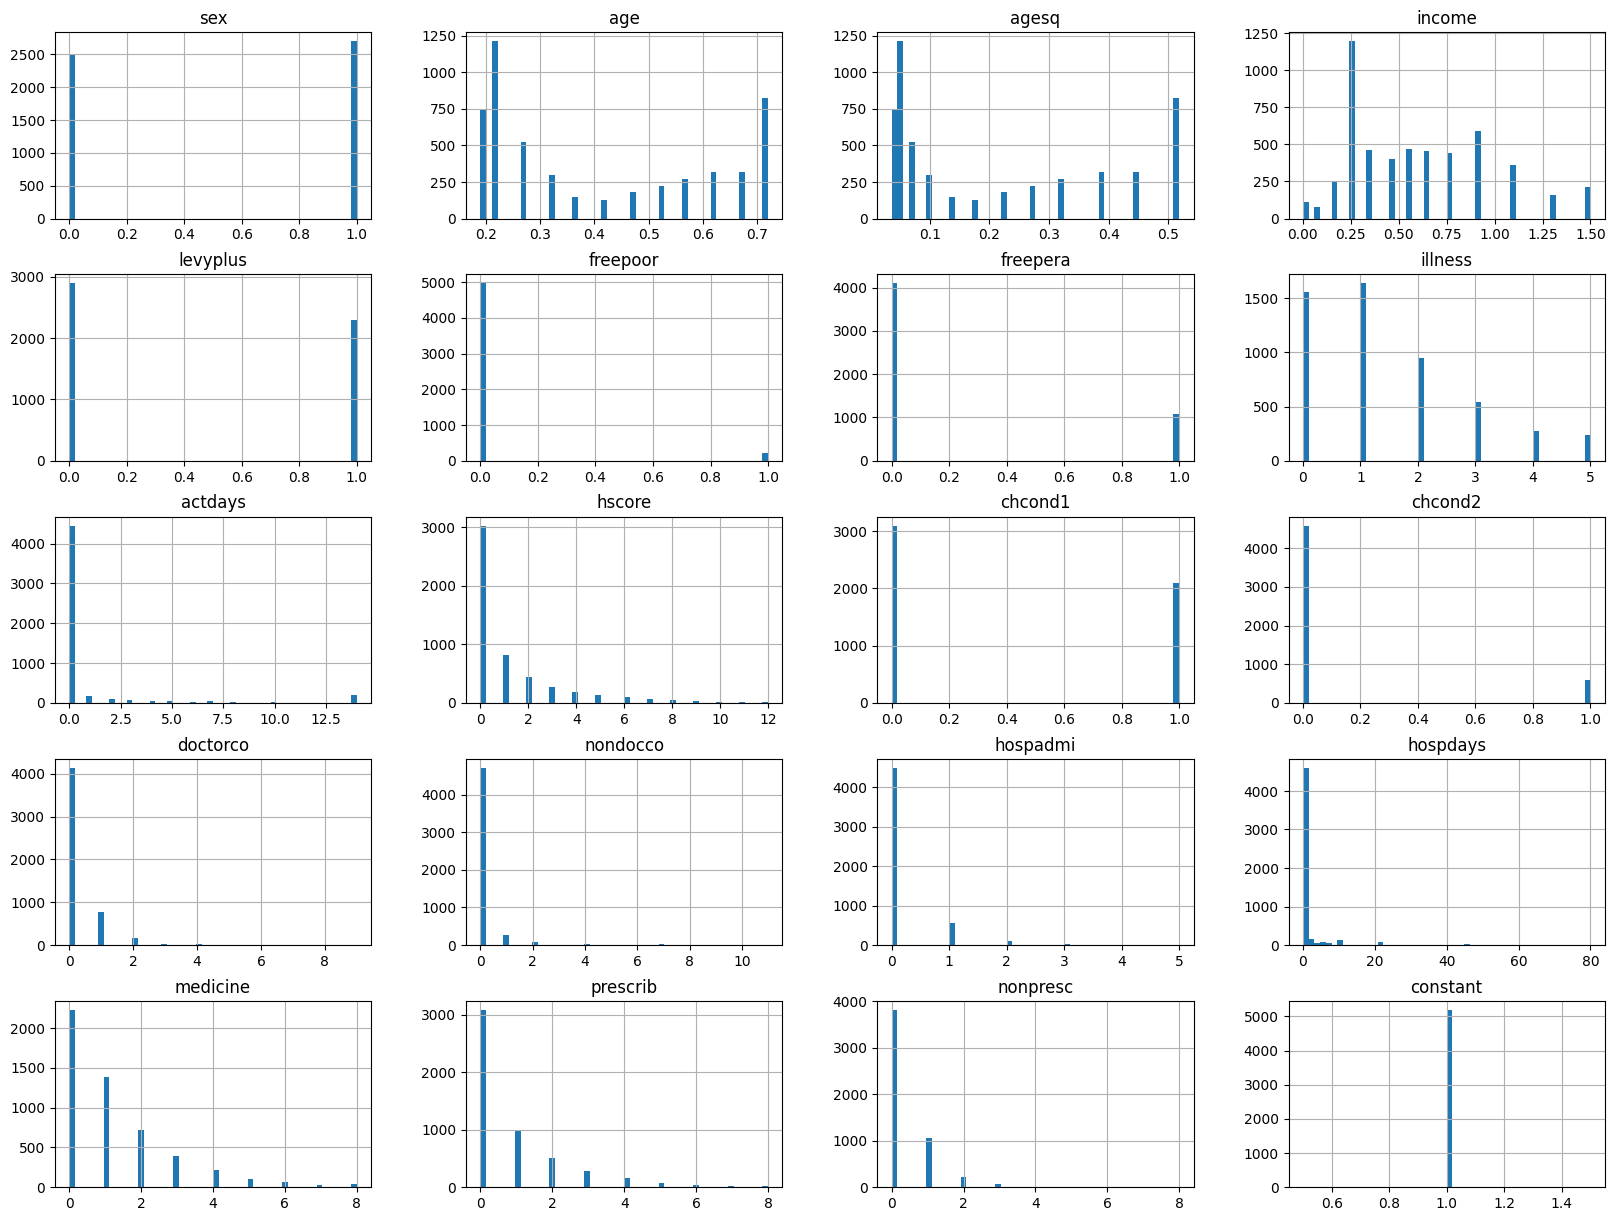

In [2]:
# plot all the columns to understand the distribution of the data
data.hist(bins=50, figsize=(20,15))
plt.show()

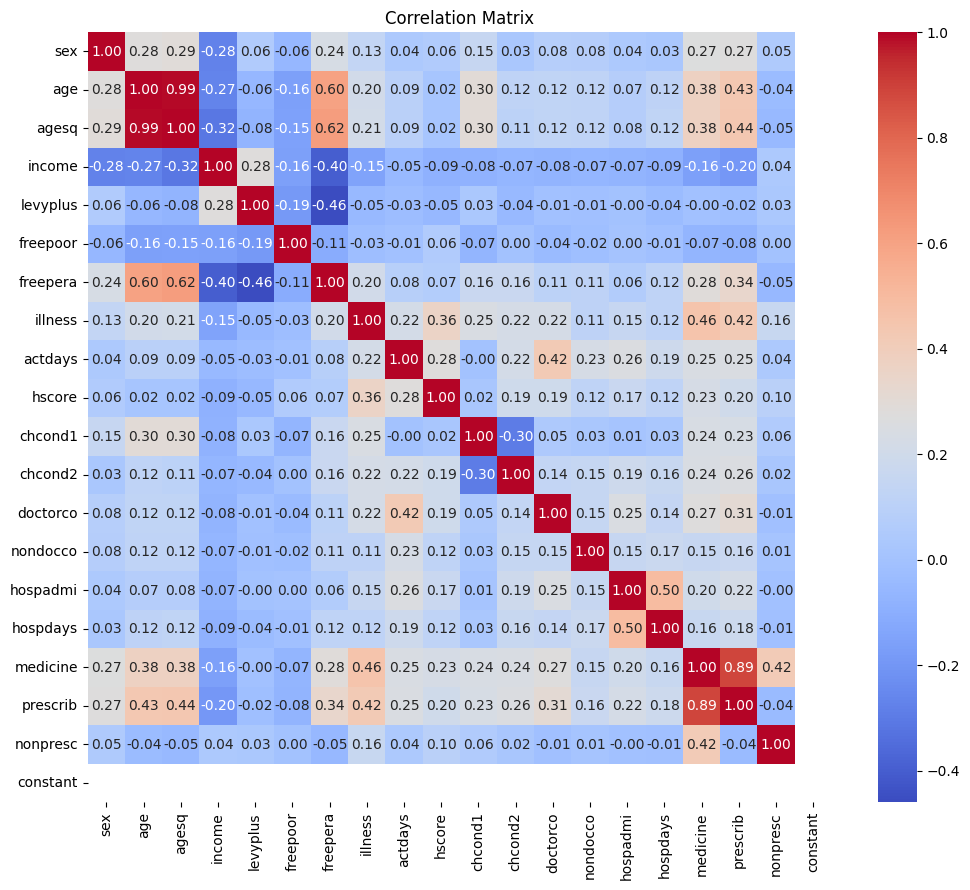

In [3]:
## Correlation matrix

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Details of this dataset

/Users/andrea.buscema/Desktop/DSAI/Lectures/1 semester/ML/Project/Git/venv/env/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


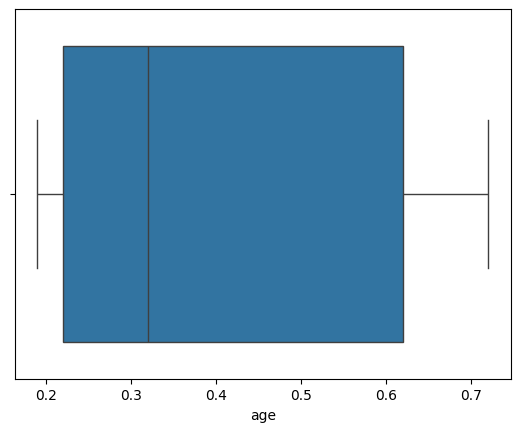

,sex,age,agesq,income,levyplus,freepoor,freepera,illness,actdays,hscore,chcond1,chcond2,doctorco,nondocco,hospadmi,hospdays,medicine,prescrib,nonpresc,constant
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.0
mean,0.520617,0.406385,0.207077,0.583160,0.442775,0.042775,0.210212,1.431985,0.861850,1.217534,0.403083,0.116570,0.301734,0.214644,0.173603,1.333719,1.218304,0.862620,0.355684,1.0
std,0.499623,0.204782,0.185636,0.368907,0.496762,0.202368,0.407498,1.384152,2.887628,2.124266,0.490564,0.320939,0.798134,0.965276,0.507524,6.120081,1.556643,1.415375,0.712389,0.0
min,0.000000,0.190000,0.036100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.220000,0.048400,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.320000,0.102400,0.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,1.000000,0.620000,0.384400,0.900000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.0
max,1.000000,0.720000,0.518400,1.500000,1.000000,1.000000,1.000000,5.000000,14.000000,12.000000,1.000000,1.000000,9.000000,11.000000,5.000000,80.000000,8.000000,8.000000,8.000000,1.0


In [4]:
# insight of age
sns.boxplot(x='age', data=data)
plt.show()

# Checking the nature of the 'age' variable
age_descriptive_stats = data['age'].describe()
age_value_counts = data['age'].value_counts().sort_index()

age_descriptive_stats, age_value_counts.head(15)  # Display the first 15 value counts for overview

#Checking the nature of all the variables
data.describe()



In [30]:
#sex
print(data['sex'].describe())
print(data['sex'].value_counts().sort_index().head(15))

#income
print(data['income'].describe())
print(data['income'].value_counts().sort_index().head(15))

#levyplus
print(data['levyplus'].describe())
print(data['levyplus'].value_counts().sort_index().head(15))

#freepoor
print(data['freepoor'].describe())
print(data['freepoor'].value_counts().sort_index().head(15))

#freepera
print(data['freepera'].describe())
print(data['freepera'].value_counts().sort_index().head(15))

#illness
print(data['illness'].describe())
print(data['illness'].value_counts().sort_index().head(15))

#actdays
print(data['actdays'].describe())
print(data['actdays'].value_counts().sort_index().head(15))

#hscore
print(data['hscore'].describe())
print(data['hscore'].value_counts().sort_index().head(15))

#chcond1 and chcond2
print(data['chcond1'].describe())
print(data['chcond1'].value_counts().sort_index().head(15))

print(data['chcond2'].describe())
print(data['chcond2'].value_counts().sort_index().head(15))

#nondocco
print(data['nondocco'].describe())
print(data['nondocco'].value_counts().sort_index().head(15))

#hospadmi
print(data['hospadmi'].describe())
print(data['hospadmi'].value_counts().sort_index().head(15))

#hospdays
print(data['hospdays'].describe())
print(data['hospdays'].value_counts().sort_index().head(15))

#medicine
print(data['medicine'].describe())
print(data['medicine'].value_counts().sort_index().head(15))

#prescrib
print(data['prescrib'].describe())
print(data['prescrib'].value_counts().sort_index().head(15))

#nonpresc
print(data['nonpresc'].describe())
print(data['nonpresc'].value_counts().sort_index().head(15))

#response variable doctorco
print(data['doctorco'].describe())
print(data['doctorco'].value_counts().sort_index().head(15))

#age
print(data['age'].describe())
print(data['age'].value_counts().sort_index().head(15))

count    5190.000000
mean        0.520617
std         0.499623
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64
sex
0    2488
1    2702
Name: count, dtype: int64
count    5190.000000
mean        0.583160
std         0.368907
min         0.000000
25%         0.250000
50%         0.550000
75%         0.900000
max         1.500000
Name: income, dtype: float64
income
0.00      79
0.01      35
0.06      80
0.15     249
0.25    1195
0.35     462
0.45     400
0.55     467
0.65     455
0.75     441
0.90     589
1.10     361
1.30     162
1.50     215
Name: count, dtype: int64
count    5190.000000
mean        0.442775
std         0.496762
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: levyplus, dtype: float64
levyplus
0    2892
1    2298
Name: count, dtype: int64
count    5190.000000
mean        0.042775
std         0.202368
min         0.000000
25%   

### Variance Inflation Factor (VIF) for each predictors

In [6]:
# VIF
# selecting numeric data
numeric_data = data.select_dtypes(include=[np.number])

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_data.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]

vif_data.sort_values(by="VIF", ascending=False)

/Users/andrea.buscema/Desktop/DSAI/Lectures/1 semester/ML/Project/Git/venv/env/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
18,nonpresc,inf
17,prescrib,inf
16,medicine,inf
2,agesq,74.638307
1,age,72.289266
19,constant,53.458550
6,freepera,2.474751
4,levyplus,1.559572
3,income,1.519868
7,illness,1.495175


The Variance Inflation Factor (VIF) for each variable in your dataset is now calculated. Here's what we can interpret from the results:

1. Infinite VIF: Variables like 'nonpresc', 'prescrib', and 'medicine' have an infinite VIF. This usually indicates perfect or near-perfect multicollinearity. It could be due to a perfect linear relationship between these variables. You should investigate these relationships further, and you might need to consider removing or combining these variables.

2. High VIF: Variables 'agesq' and 'age' also have high VIF values, indicating potential multicollinearity. This is expected as 'agesq' (age squared) is derived from 'age', so they are inherently correlated.

3. Moderate to Low VIF: The rest of the variables have moderate to low VIF values, suggesting less concern for multicollinearity.

Given these findings, consider the following steps:
- Investigate the relationship between 'nonpresc', 'prescrib' and 'medicine' -> We can consider only medicine
- Since 'agesq' is derived from 'age', we can consider using only one of these (probably age)


After that, we can recalculate the VIFs

decided to exclude the variables 'nonpresc' and 'prescrib' from your analysis due to their high multicollinearity. Additionally, want to check the impact on multicollinearity by excluding 'agesq' in one instance and 'age' in another.

first calculate the Variance Inflation Factor (VIF) after excluding 'nonpresc' and 'prescrib'. Then, I will recalculate it twice: once with 'agesq' excluded and again with 'age' excluded.

In [7]:
# Dropping 'nonpresc' and 'prescrib' from the data
data_reduced = data.drop(columns=['nonpresc', 'prescrib'])

# Recalculating VIF without 'nonpresc' and 'prescrib'
numeric_data_reduced = data_reduced.select_dtypes(include=[np.number])
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = numeric_data_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(numeric_data_reduced.values, i) for i in range(len(numeric_data_reduced.columns))]

vif_data_reduced.sort_values(by="VIF", ascending=False)

,feature,VIF
2,agesq,74.165475
1,age,72.049113
17,constant,53.457004
6,freepera,2.468151
16,medicine,1.583240
4,levyplus,1.558805
3,income,1.519708
7,illness,1.495142
14,hospadmi,1.431912
11,chcond2,1.411864


excluding 'agesq'

In [8]:
# Scenario 1: Dropping 'agesq' from the data
data_no_agesq = data_reduced.drop(columns=['agesq'])

# Recalculating VIF without 'agesq'
numeric_data_no_agesq = data_no_agesq.select_dtypes(include=[np.number])
vif_data_no_agesq = pd.DataFrame()
vif_data_no_agesq["feature"] = numeric_data_no_agesq.columns
vif_data_no_agesq["VIF"] = [variance_inflation_factor(numeric_data_no_agesq.values, i) for i in range(len(numeric_data_no_agesq.columns))]

vif_data_no_agesq.sort_values(by="VIF", ascending=False)


,feature,VIF
16,constant,13.265620
5,freepera,2.458297
1,age,1.967601
15,medicine,1.582922
3,levyplus,1.558234
6,illness,1.490118
13,hospadmi,1.431873
9,chcond1,1.404345
10,chcond2,1.382901
7,actdays,1.368214


Excluding 'age'

In [9]:
# Scenario 2: Dropping 'age' from the data
data_no_age = data_reduced.drop(columns=['age'])

# Recalculating VIF without 'age'
numeric_data_no_age = data_no_age.select_dtypes(include=[np.number])
vif_data_no_age = pd.DataFrame()
vif_data_no_age["feature"] = numeric_data_no_age.columns
vif_data_no_age["VIF"] = [variance_inflation_factor(numeric_data_no_age.values, i) for i in range(len(numeric_data_no_age.columns))]

vif_data_no_age.sort_values(by="VIF", ascending=False)

,feature,VIF
16,constant,10.508938
5,freepera,2.466568
1,agesq,2.025397
15,medicine,1.582923
3,levyplus,1.553430
6,illness,1.489374
13,hospadmi,1.431804
9,chcond1,1.398797
10,chcond2,1.379410
7,actdays,1.368266


In Scenario 1, after excluding 'agesq', we observe the following changes:

- The VIF for 'age' has significantly decreased to 1.97, which is below the threshold of concern for multicollinearity.
- The highest VIF is now for the 'constant' variable, which is a typical placeholder in regression models. Its high VIF might not be a concern in this context.

In Scenario 2, where 'age' was excluded and 'agesq' retained, we observe the following:

- The VIF for 'agesq' is significantly reduced to 2.03, which is well within acceptable limits and indicates a low risk of multicollinearity.
- Similar to Scenario 1, the highest VIF is for the 'constant' variable.

Summary and Recommendation:
- Scenario 1 (Excluding 'agesq'): The VIFs are generally low, with 'constant' having the highest VIF. The concern for multicollinearity is minimal.
- Scenario 2 (Excluding 'age'): The VIFs are also low, with 'constant' again showing the highest VIF. The concern for multicollinearity is minimal in this scenario as well.

Both scenarios effectively reduce multicollinearity. The choice between them may depend on which variable ('age' or 'agesq') is more relevant or interpretable for your analysis. If 'age' in its linear form (as opposed to squared) is more interpretable in the context of your study, you might prefer Scenario 1. If the squared age ('agesq') has more relevance (perhaps due to a nonlinear relationship with the dependent variable), then Scenario 2 would be preferable.

Remove constant from the model and recalculate the VIFs

In [10]:
# Removing 'constant' and keeping 'age' instead of 'agesq'
data_final = data_no_agesq.drop(columns=['constant'])

# Recalculating VIF for the final dataset
numeric_data_final = data_final.select_dtypes(include=[np.number])
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = numeric_data_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(numeric_data_final.values, i) for i in range(len(numeric_data_final.columns))]

vif_data_final.sort_values(by="VIF", ascending=False)

,feature,VIF
1,age,7.287895
5,freepera,3.110701
6,illness,2.977291
3,levyplus,2.754422
2,income,2.692674
15,medicine,2.519721
0,sex,2.354090
9,chcond1,2.351841
8,hscore,1.633218
13,hospadmi,1.595056


These results indicate that multicollinearity is now at a more manageable level:

1. VIF Values: All the VIF values are below the common threshold of 10, with 'age' having the highest VIF of approximately 7.29. This suggests that while there is some multicollinearity present, it's not at a level that should severely impact the regression analysis.

2. Interpretation:

- Variables with Higher VIF: 'age', 'freepera', 'illness', 'levyplus', and 'income'. These variables have VIFs above 2, indicating some degree of multicollinearity, but not to a problematic extent.
- Variables with Lower VIF: The rest of the variables, including 'sex', 'hscore', 'hospadmi', and others, show VIF values well within acceptable limits, indicating that they contribute unique information to the model without much redundancy.

With these VIF values, we can proceed with more confidence that the multicollinearity in dataset won't unduly influence regression results.

# Inference analysis

As the response variable is 'doctorco', Number of consultations with a doctor or specialist in the past 2 weeks, we can check the nature of this variable and its distribution.

The histogram shows that the distribution of 'doctorco' is right-skewed, with a long tail to the right. This suggests that a large proportion of the respondents have a low number of consultations, while a smaller proportion have a higher number of consultations.

The box plot also confirms the presence of outliers, which are the points beyond the whiskers. These outliers are the respondents who have a significantly higher number of consultations compared to the rest of the sample.

The presence of outliers and the right-skewed distribution of 'doctorco' suggest that the data might benefit from a transformation to make it more suitable for regression analysis. A common transformation for right-skewed data is the logarithmic transformation.

After applying the logarithmic transformation to 'doctorco', we can see that the distribution is more symmetric and the outliers are less prominent. This transformation can help address the issues of skewness and outliers, making the data more suitable for regression analysis.


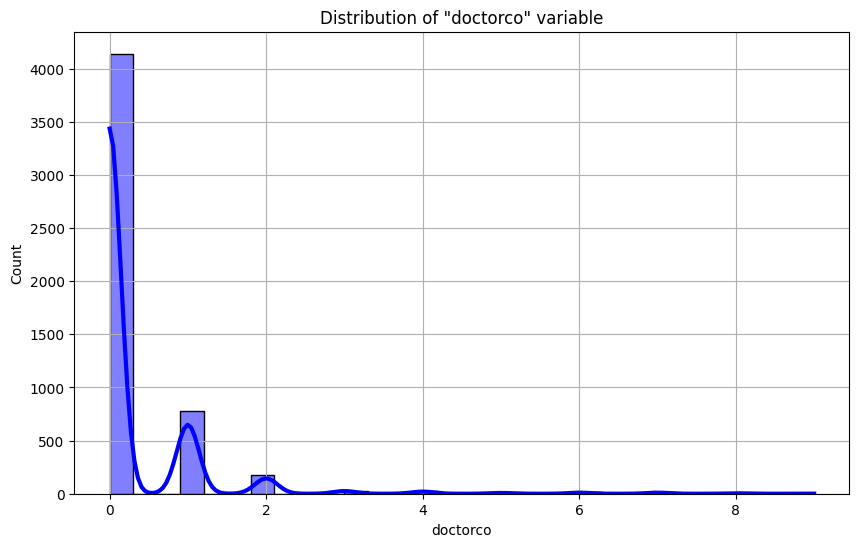

In [11]:
# Checking the nature of the 'doctorco' variable
data_final['doctorco'].value_counts()

# Calculating the statistics for 'doctorco'
data_final['doctorco'].describe()

# Plotting the distribution of 'doctorco'
plt.figure(figsize=(10, 6))
sns.histplot(data_final['doctorco'], kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of "doctorco" variable')
plt.grid(True)
plt.show()


In [12]:
# Checking the nature of the 'doctorco' variable
doctorco_descriptive_stats = data_final['doctorco'].describe()
doctorco_value_counts = data_final['doctorco'].value_counts().sort_index()

doctorco_descriptive_stats, doctorco_value_counts.head(10)  # Display the first 10 value counts for overview


(count    5190.000000
 mean        0.301734
 std         0.798134
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         9.000000
 Name: doctorco, dtype: float64,
 doctorco
 0    4141
 1     782
 2     174
 3      30
 4      24
 5       9
 6      12
 7      12
 8       5
 9       1
 Name: count, dtype: int64)

As seen before: 
- 'doctorco' (Response Variable): This variable is already in a suitable format for a ZINB model as it is a count variable with many zeros. No transformation is needed here.

- 'age': The 'age' variable appears to be normalized between 0 and 1. If it's proportionate to the actual age, you might not need to transform it unless there's a specific reason to do so.

- Binary Variables ('sex', 'levyplus', 'freepoor', 'freepera', 'chcond1', 'chcond2'): These are binary variables (0/1) and don't need transformation for inclusion in a regression model like ZINB.

- 'income': This continuous variable ranges from 0 to 1.5, likely normalized. If it's proportionate to actual income levels, you typically wouldn't need to transform it unless it shows a skewed distribution or non-linear relationship with the response variable.

- Count Variables ('illness', 'actdays', 'hscore', 'nondocco', 'hospadmi', 'hospdays', 'medicine', 'prescrib', 'nonpresc'): These are count variables similar to 'doctorco'. They can be used directly in the ZINB model, but check for overdispersion.

- Checking Distributions: It's important to plot the distributions of these variables, especially to see if any transformations (like log transformation for skewed data) are necessary.

- Model Specification: For the ZINB model, decide which variables to include in the count model part and which in the zero-inflated part. This decision is usually based on theory or prior research indicating which variables are likely to influence the count of events versus the propensity for zero counts.

- Interactions and Non-linear Effects: Consider testing for interaction effects between variables or non-linear effects (e.g., quadratic terms) if theoretically justified.

- Standardization: If you're including variables with different scales in the model, consider standardizing them to have a mean of 0 and a standard deviation of 1.

some insights based on the histograms:

- Binary Variables ('sex', 'levyplus', 'freepoor', 'freepera', 'chcond1', 'chcond2'): These variables show two bars corresponding to the binary outcomes (0 and 1). No transformation is required for binary variables in logistic components of the ZINB model.

- 'age' and 'agesq': 'age' appears to be normally distributed, which is good for linear models. 'agesq' likely represents the squared term of age, indicating a potential non-linear relationship with the response variable.

- 'income': The distribution of 'income' is skewed to the right. Depending on how 'income' relates to 'doctorco', you might consider a transformation like logarithmic transformation to normalize the distribution.

- Count Variables ('illness', 'actdays', 'hscore', 'nondocco', 'hospadmi', 'hospdays', 'medicine', 'prescrib', 'nonpresc'): Most of these variables are highly skewed, with a large number of zeros, which is expected for count data in a healthcare context.

- 'doctorco': The target variable shows a large number of zeros and a rapidly declining frequency for higher counts, which justifies the use of a zero-inflated model.

Instead, models that are better suited for count data and can handle a high incidence of zero counts should be considered:

- **Poisson Regression**: Traditionally used for count data. However, it assumes that the mean and variance are equal, which might not be the case here.

- **Negative Binomial Regression**: Often used for over-dispersed count data (where the variance exceeds the mean). It might be more appropriate given the standard deviation and the mean of your data.

- **Zero-Inflated Models**: Since a large portion of the data is zeros, zero-inflated versions of Poisson or negative binomial regression could be suitable. These models have two parts: one part models the probability of getting a zero, and the other models the count part.

## Poisson Regression Model
Poisson regression is used for modeling count data and can show how the predictors are related to the rate of occurrence of an event - in this case, the number of doctor consultations.

Here are the steps we'll take to build and evaluate a Poisson regression model:

1. Model Building: We will use your dataset to build a Poisson regression model with doctorco as the response variable and the other variables as predictors.

2. Model Evaluation: We'll evaluate the model's goodness-of-fit. Common metrics include the deviance, Akaike Information Criterion (AIC), and the significance of predictors.

3. Interpretation: We'll interpret the model's coefficients to understand the relationship between each predictor and the rate of doctor consultations.

4. Assumptions and Limitations: We'll discuss the assumptions of Poisson regression and any limitations in the context of your dataset.

In [13]:
import statsmodels.api as sm

# Preparing the data for Poisson regression
X = data_final.drop('doctorco', axis=1)  # Predictor variables
y = data_final['doctorco']  # Response variable

# Adding a constant to the predictor variables
X = sm.add_constant(X)

# Building the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Summary of the model
print(poisson_model.summary())
print("AIC of Poisson ", poisson_model.aic)


                 Generalized Linear Model Regression Results                  
Dep. Variable:               doctorco   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5174
Model Family:                 Poisson   Df Model:                           15
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3307.8
Date:                Mon, 19 Feb 2024   Deviance:                       4284.0
Time:                        13:34:57   Pearson chi2:                 6.76e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2292
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0250      0.102    -19.762      0.0

- Assumptions: One of the key assumptions of Poisson regression is that the mean and variance of the dependent variable are equal (equidispersion). The presence of overdispersion (variance greater than the mean) suggests that this assumption may not hold.


## Negative Binomial Regression Model

Negative binomial regression is a type of generalized linear model used for modeling count data, especially when the data show overdispersion. Overdispersion occurs when the variance of the dependent variable is greater than the mean, which is common in count data.

Here are the steps we'll take to build and evaluate a negative binomial regression model:

1. Model Building: We will use your dataset to build a negative binomial regression model with doctorco as the response variable and the other variables as predictors.

2. Model Evaluation: We'll evaluate the model's goodness-of-fit. Common metrics include the deviance, Akaike Information Criterion (AIC), and the significance of predictors.

3. Interpretation: We'll interpret the model's coefficients to understand the relationship between each predictor and the rate of 'doctorco'

4. Assumptions and Limitations: We'll discuss the assumptions of negative binomial regression and any limitations in the context of dataset.

- Assumptions: Negative binomial regression relaxes the equidispersion assumption of Poisson regression, making it suitable for overdispersed count data. However, it still assumes that the relationship between the predictors and the response variable is linear on the log scale.

In [14]:
from statsmodels.discrete.discrete_model import NegativeBinomial

# Fit a negative binomial model
nb_model = NegativeBinomial(y, X).fit(maxiter=200)

# Summary of the model
print(nb_model.summary())

# Compare AIC values
print("AIC for Poisson model:", poisson_model.aic)
print("AIC for Negative Binomial model:", nb_model.aic)


# significance of predictors
print(nb_model.pvalues)


Optimization terminated successfully.
         Current function value: 0.611055
         Iterations: 57
         Function evaluations: 60
         Gradient evaluations: 60
                     NegativeBinomial Regression Results                      
Dep. Variable:               doctorco   No. Observations:                 5190
Model:               NegativeBinomial   Df Residuals:                     5174
Method:                           MLE   Df Model:                           15
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1156
Time:                        13:34:58   Log-Likelihood:                -3171.4
converged:                       True   LL-Null:                       -3586.0
Covariance Type:            nonrobust   LLR p-value:                4.836e-167
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1931      0.123    -1

Overdispersion statistic: 1.0117790353338323


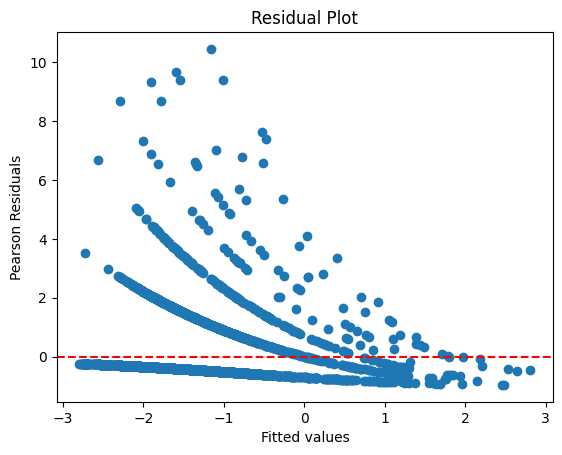

Chi-square statistic: -10737.932384074353
P-value: 1.0


In [15]:
# Calculate the Pearson residuals
pearson_residuals = nb_model.resid_pearson

# Calculate the sum of squared Pearson residuals
pearson_chi2 = np.sum(pearson_residuals**2)

# Calculate the overdispersion statistic
overdispersion_statistic = pearson_chi2 / nb_model.df_resid

print("Overdispersion statistic:", overdispersion_statistic)

# Residual plot
plt.scatter(nb_model.fittedvalues, pearson_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Pearson Residuals')
plt.title('Residual Plot')
plt.show()

# Goodness-of-fit test
from scipy.stats import chisquare

# Calculate the expected frequencies (fitted values) and observed frequencies
expected_freq = nb_model.fittedvalues
observed_freq = y

# Conduct the chi-square test
chi_square_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

print("Chi-square statistic:", chi_square_stat)
print("P-value:", p_value)

The overdispersion statistic close to 1 indicates that the Negative Binomial model is appropriate for your data as it suggests that the mean and variance of the residuals are similar, which is an assumption of the Negative Binomial distribution.

The plot shows that the residuals do not have a constant variance across all levels of fitted values — there's a clear pattern where the variance of the residuals increases as the fitted values increase, which is a sign of overdispersion. This is further confirmed by the alpha parameter (dispersion parameter) in your output, which is significantly different from zero, suggesting that the Negative Binomial model is more appropriate than the Poisson model (which assumes alpha to be zero).

This overdispersion is common with count data where incidents of the event can vary substantially across observations, and it justifies the use of a Negative Binomial model over a Poisson model, as indicated by the lower AIC value for the Negative Binomial model compared to the Poisson model.

When moving to a Zero-Inflated Negative Binomial model, you will be adding another layer to account for the excess zeros in the data. The coefficients of your model indicate the relationship between each predictor and the log count of doctor consultations, holding other variables constant. Variables with a p-value less than 0.05 are statistically significant at the 95% confidence level. Variables such as 'sex', 'freepoor', 'illness', 'actdays', 'hscore', and 'medicine' have significant coefficients, indicating they have a statistically significant relationship with the number of doctor consultations.

alpha       0.991087
hospadmi    0.209330
illness     0.166696
sex         0.166108
actdays     0.125117
freepera    0.118653
medicine    0.115602
levyplus    0.070215
age         0.067155
chcond1     0.045707
hscore      0.027395
nondocco    0.024987
chcond2     0.024942
dtype: float64


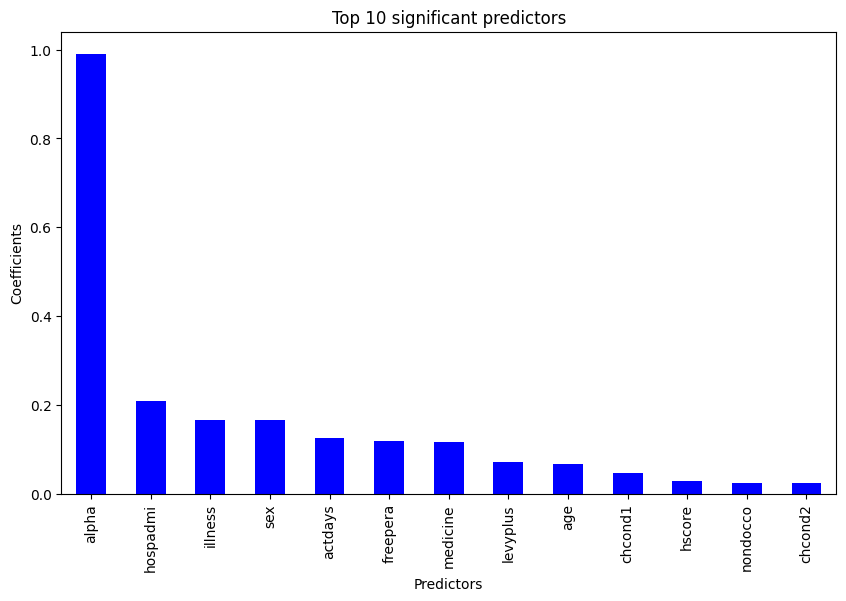

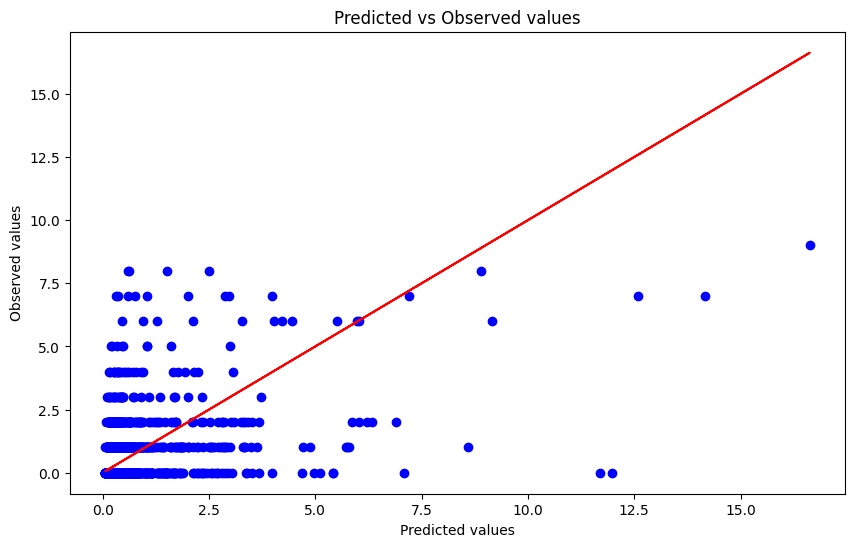

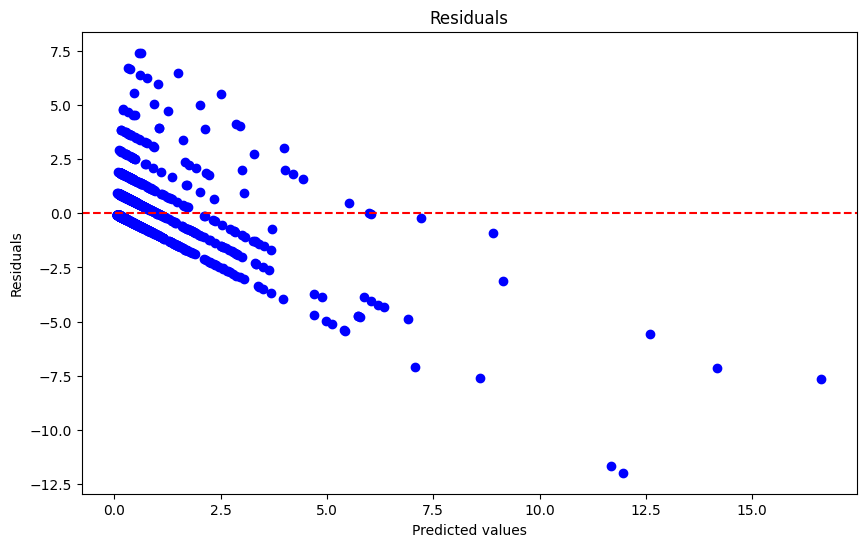

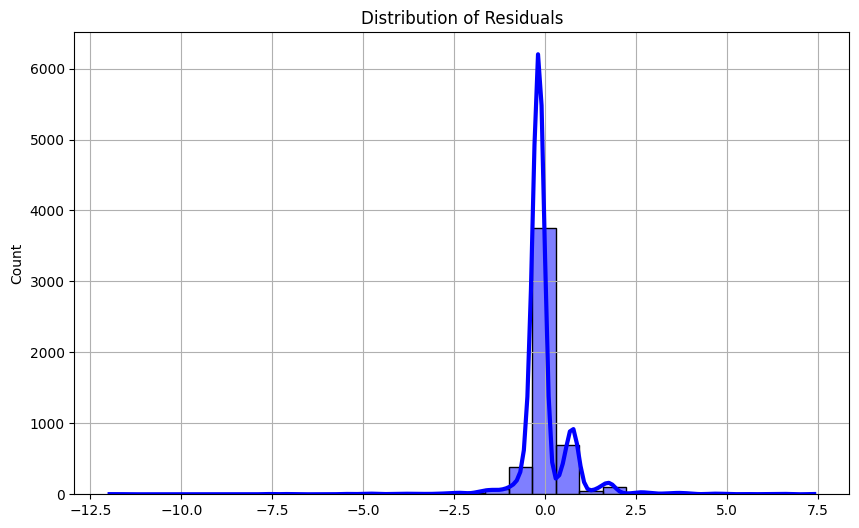

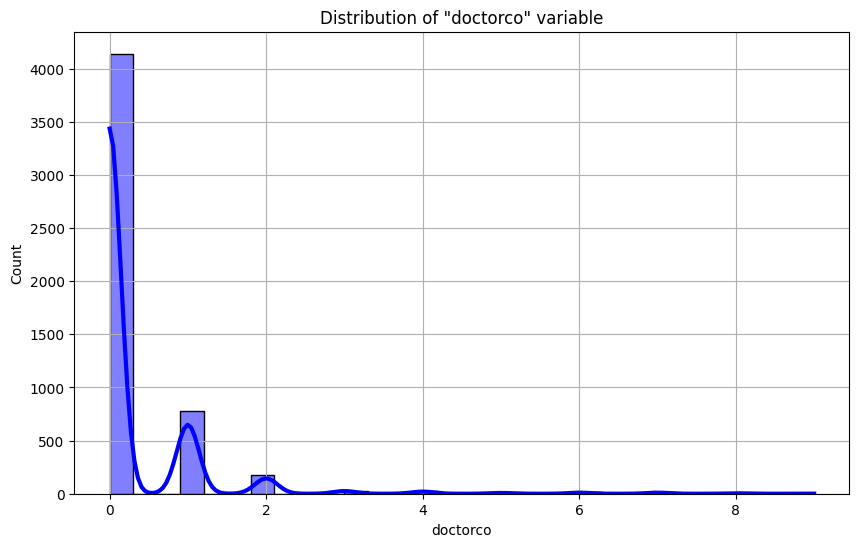

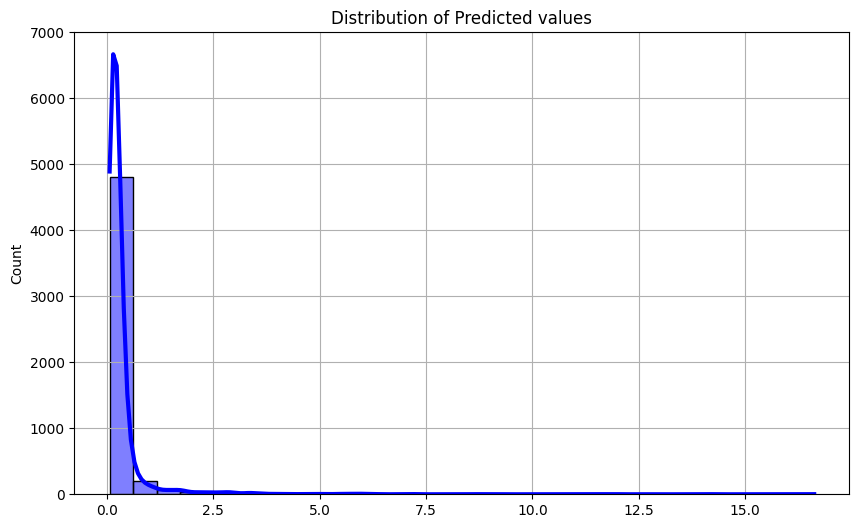

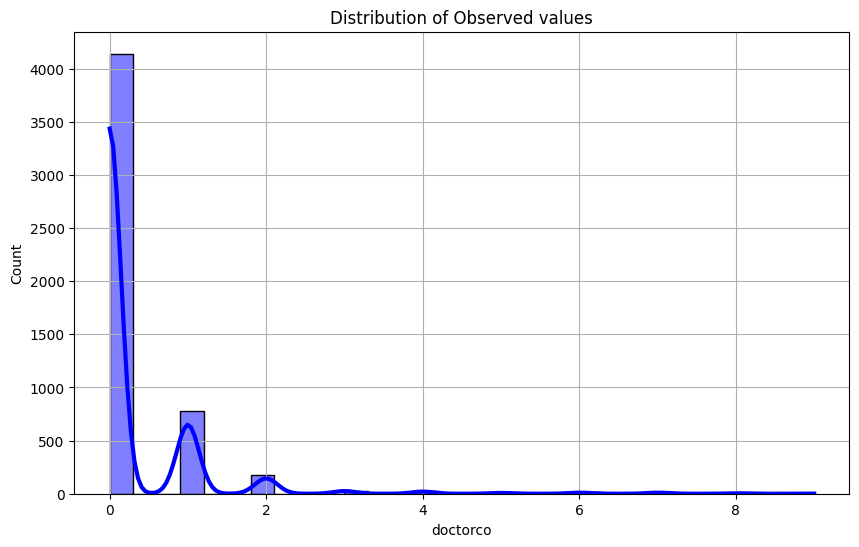

In [16]:
# take best parameters of nb_model
best_params = nb_model.params
best_params = best_params.drop('const')
best_params = best_params.sort_values(ascending=False)
best_params = best_params[best_params > 0]
best_params = best_params.head(13)
print(best_params)

# Plot the best parameters
plt.figure(figsize=(10, 6))
best_params.plot(kind='bar', color='blue')
plt.title('Top 10 significant predictors')
plt.xlabel('Predictors')
plt.ylabel('Coefficients')
plt.show()

# Predicting the response variable
y_pred = nb_model.predict(X)

# Plotting the predicted values against the observed values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y, color='blue')
plt.plot(y_pred, y_pred, color='red')
plt.title('Predicted vs Observed values')
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.show()

# Plotting the residuals
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Plotting the distribution of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

# Plotting the distribution of the response variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of "doctorco" variable')
plt.grid(True)
plt.show()

# Plotting the distribution of the predicted values
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of Predicted values')
plt.grid(True)
plt.show()

# Plotting the distribution of the observed values
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of Observed values')
plt.grid(True)
plt.show()



Optimization terminated successfully.
         Current function value: 0.611787
         Iterations: 51
         Function evaluations: 53
         Gradient evaluations: 53
                     NegativeBinomial Regression Results                      
Dep. Variable:               doctorco   No. Observations:                 5190
Model:               NegativeBinomial   Df Residuals:                     5177
Method:                           MLE   Df Model:                           12
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1146
Time:                        13:35:00   Log-Likelihood:                -3175.2
converged:                       True   LL-Null:                       -3586.0
Covariance Type:            nonrobust   LLR p-value:                3.794e-168
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3444      0.092    -2

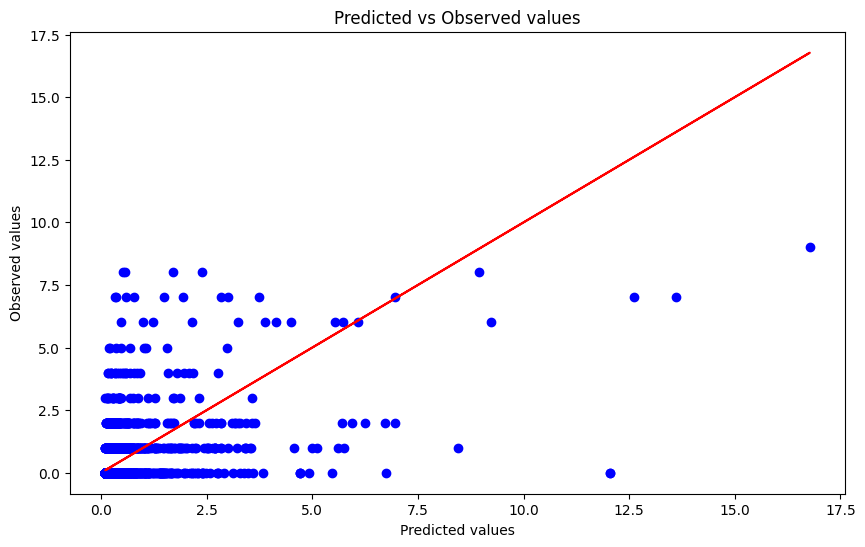

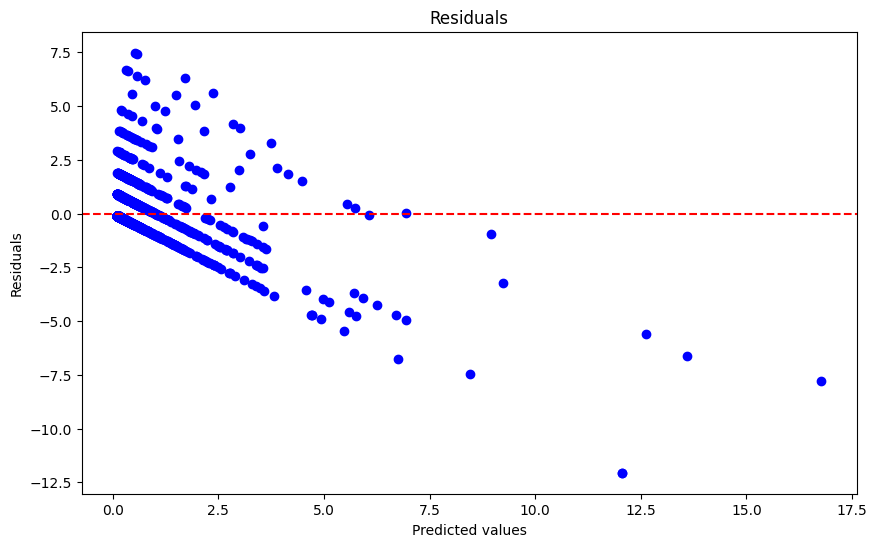

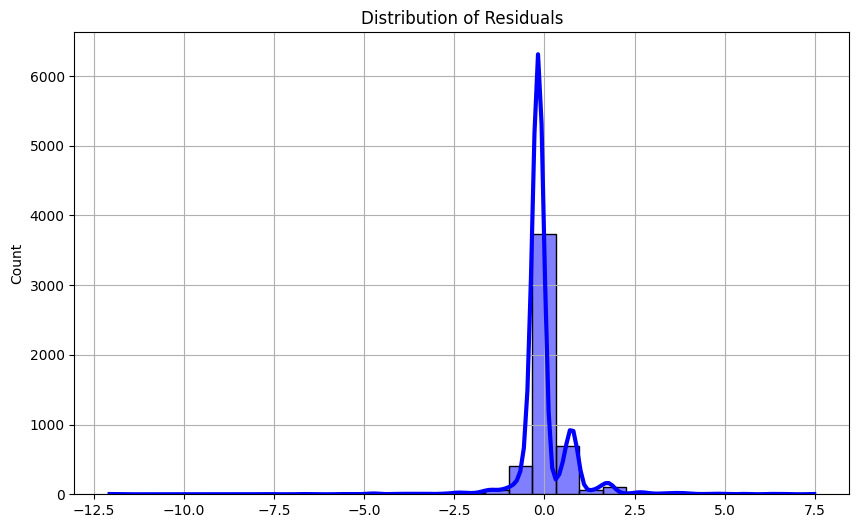

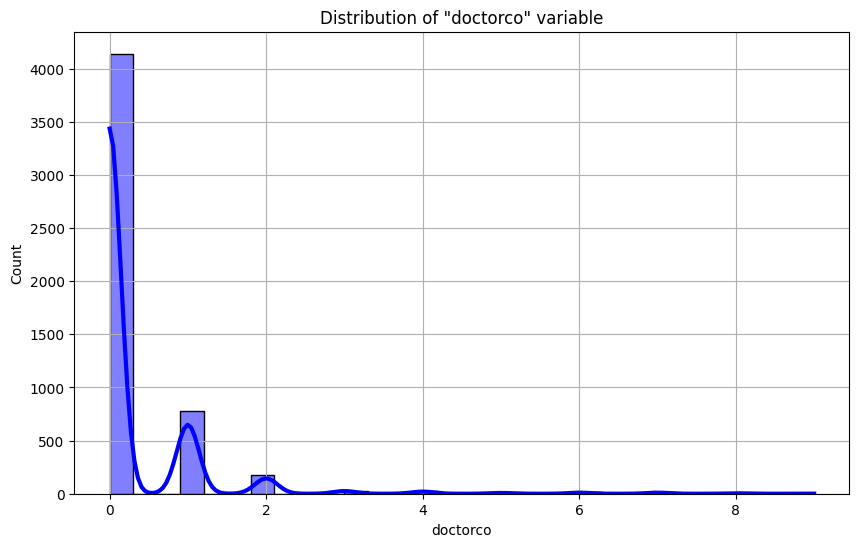

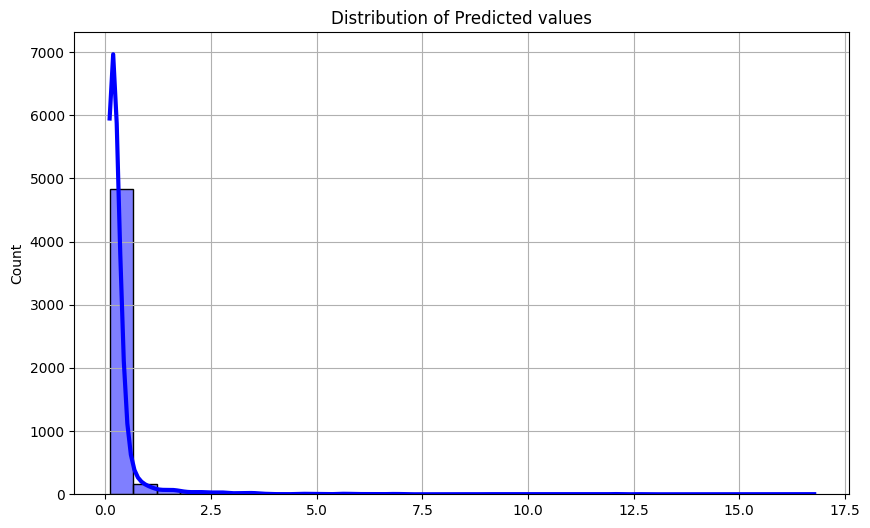

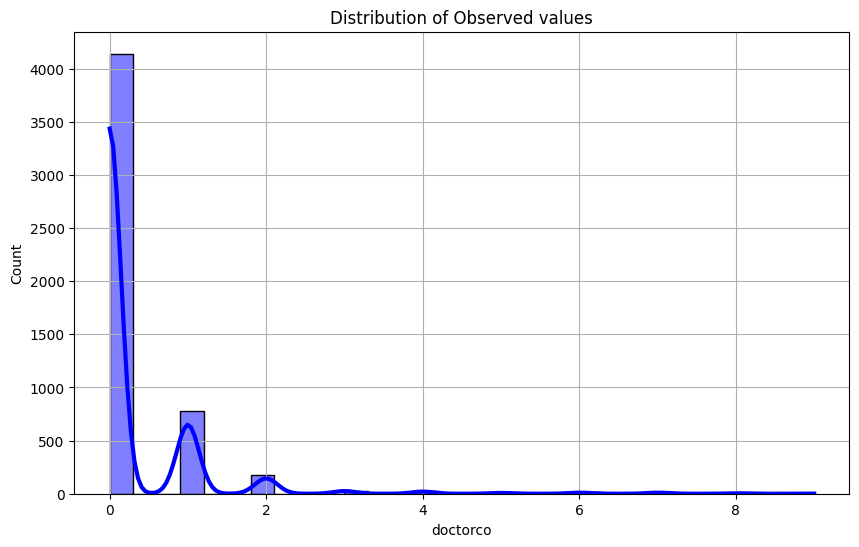

In [17]:


#model with the best parameters : hospadmi illness sex actdays freepera medicine levyplus age chcond1 hscore nondocco chcond2
X_best = data_final[['hospadmi', 'illness', 'sex', 'actdays', 'freepera', 'medicine', 'levyplus', 'age', 'chcond1', 'hscore', 'nondocco', 'chcond2']]
y_best = data_final['doctorco']

# Adding a constant to the predictor variables
X_best = sm.add_constant(X_best)

# Fit a negative binomial model
nb_model_best = NegativeBinomial(y_best, X_best).fit(maxiter=200)

# Summary of the model
print(nb_model_best.summary())

# Compare AIC values
print("AIC for Negative Binomial model:", nb_model.aic)
print("AIC for Negative Binomial model with best parameters:", nb_model_best.aic)

# Predicting the response variable
y_pred_best = nb_model_best.predict(X_best)

# Plotting the predicted values against the observed values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, y, color='blue')
plt.plot(y_pred_best, y_pred_best, color='red')
plt.title('Predicted vs Observed values')
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.show()

# Plotting the residuals
residuals_best = y - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals_best, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Plotting the distribution of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_best, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

# Plotting the distribution of the response variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of "doctorco" variable')
plt.grid(True)
plt.show()

# Plotting the distribution of the predicted values
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_best, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of Predicted values')
plt.grid(True)
plt.show()

# Plotting the distribution of the observed values
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, 
             color='blue', line_kws={'linewidth': 3})
plt.title('Distribution of Observed values')
plt.grid(True)
plt.show()



# Zero Inflated Model

## Zero-Inflated Negative Binomial Model with all features

In [18]:
#fit the zero-inflated negative binomial model using all features
zinb_model_all = sm.ZeroInflatedNegativeBinomialP(y, X).fit(maxiter=200)
print(X)
#print the summary of the model and AIC
print(zinb_model_all.summary())
print("AIC of ZI NB model with all features: ", zinb_model_all.aic)

Optimization terminated successfully.
         Current function value: 0.611055
         Iterations: 97
         Function evaluations: 99
         Gradient evaluations: 99
      const  sex   age  income  levyplus  freepoor  freepera  illness  \
0       1.0    1  0.19    0.55         1         0         0        1   
1       1.0    1  0.19    0.45         1         0         0        1   
2       1.0    0  0.19    0.90         0         0         0        3   
3       1.0    0  0.19    0.15         0         0         0        1   
4       1.0    0  0.19    0.45         0         0         0        2   
...     ...  ...   ...     ...       ...       ...       ...      ...   
5185    1.0    1  0.22    0.55         0         0         0        0   
5186    1.0    0  0.27    1.30         0         0         0        0   
5187    1.0    1  0.37    0.25         0         0         1        1   
5188    1.0    1  0.52    0.65         0         0         0        0   
5189    1.0    0  0.72   

alpha       0.991122
hospadmi    0.209308
illness     0.166699
sex         0.166105
actdays     0.125116
freepera    0.118413
medicine    0.115618
levyplus    0.070177
age         0.067709
chcond1     0.045729
hscore      0.027398
chcond2     0.024993
nondocco    0.024989
hospdays    0.001818
dtype: float64


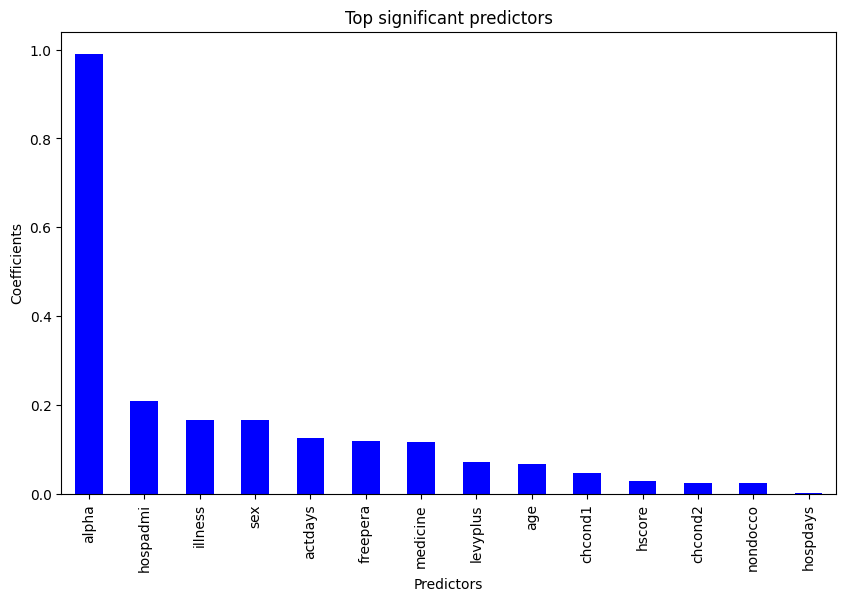

In [19]:
#find the best parameters for this model
best_params_zinb_all = zinb_model_all.params
best_params_zinb_all = best_params_zinb_all.drop('const')
best_params_zinb_all = best_params_zinb_all.sort_values(ascending=False)
best_params_zinb_all = best_params_zinb_all[best_params_zinb_all > 0]
best_params_zinb_all = best_params_zinb_all.head(16)
print(best_params_zinb_all)

# Plot the best parameters
plt.figure(figsize=(10, 6))
best_params_zinb_all.plot(kind='bar', color='blue')
plt.title('Top significant predictors')
plt.xlabel('Predictors')
plt.ylabel('Coefficients')
plt.show()


In [20]:
#fit the zero-inflated negative binomial model using best parameters
X_best_zinb = data_final[['hospadmi', 'illness', 'sex', 'actdays', 'freepera', 'medicine', 'levyplus', 'age', 'chcond1', 'hscore', 'nondocco', 'chcond2', 'hospdays']]
y_best_zinb = data_final['doctorco']

# Adding a constant to the predictor variables
X_best_zinb = sm.add_constant(X_best_zinb)

# Fit a zero-inflated negative binomial model
zinb_model_best = sm.ZeroInflatedNegativeBinomialP(y_best_zinb, X_best_zinb).fit(maxiter=200)
print(zinb_model_best.summary())
print("AIC of ZI NB model with best parameters: ", zinb_model_best.aic)


Optimization terminated successfully.
         Current function value: 0.611767
         Iterations: 80
         Function evaluations: 82
         Gradient evaluations: 82
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                          doctorco   No. Observations:                 5190
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     5176
Method:                                      MLE   Df Model:                           13
Date:                           Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1146
Time:                                   13:35:05   Log-Likelihood:                -3175.1
converged:                                  True   LL-Null:                       -3586.0
Covariance Type:                       nonrobust   LLR p-value:                2.891e-167
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

### Replicating the Zero-Inflated Negative Binomial Model of Tanja's report

Initial ZINB Model 

In [21]:
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# Assuming 'data' is your DataFrame and 'y' is your response variable 'doctorco'
X = data[['age', 'sex', 'income', 'levyplus', 'freepoor', 'freepera', 'illness', 
          'actdays', 'hscore', 'chcond1', 'chcond2', 'nondocco', 'hospadmi', 
          'hospdays', 'prescrib', 'nonpresc']]
y = data['doctorco']

# Add a constant to the model
X_with_const = sm.add_constant(X)

# Define the model
initial_model_NBZ = ZeroInflatedNegativeBinomialP(y, X_with_const, exog_infl=X_with_const, inflation='logit')

# Fit the model
initial_NBZ_results = initial_model_NBZ.fit(maxiter=200)

# Print the summary
print(initial_NBZ_results.summary())
print("AIC of the initial model:", initial_NBZ_results.aic)


Optimization terminated successfully.
         Current function value: 0.578369
         Iterations: 171
         Function evaluations: 173
         Gradient evaluations: 173
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                          doctorco   No. Observations:                 5190
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     5173
Method:                                      MLE   Df Model:                           16
Date:                           Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1629
Time:                                   13:35:15   Log-Likelihood:                -3001.7
converged:                                  True   LL-Null:                       -3586.0
Covariance Type:                       nonrobust   LLR p-value:                8.515e-239
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------

Updated ZINB Model

In [22]:
# Adding interaction terms and specific predictors
data['income_levyplus'] = data['income'] * data['levyplus']
data['illness_actdays'] = data['illness'] * data['actdays']
data['age_chcond2'] = data['age'] * data['chcond2']

X_updated = data[['income', 'levyplus', 'freepera', 'illness', 'actdays', 
                  'hscore', 'chcond1', 'hospadmi', 'prescrib', 'nonpresc', 
                  'income_levyplus', 'illness_actdays', 'age_chcond2']]

# For zero-inflation part
X_infl = data[['levyplus', 'freepoor', 'freepera', 'illness', 'actdays', 
               'nondocco', 'hospdays', 'prescrib', 'illness_actdays']]

X_updated_with_const = sm.add_constant(X_updated)
X_infl_with_const = sm.add_constant(X_infl)

# Define the updated model
updated_model_NBZ = ZeroInflatedNegativeBinomialP(y, X_updated_with_const, exog_infl=X_infl_with_const, inflation='logit')

# Fit the model
updated_NBZ_results = updated_model_NBZ.fit(maxiter=200)

# Print the summary
print(updated_NBZ_results.summary())
print("AIC of the updated model:", updated_NBZ_results.aic)
print("AIC of the initial model:", initial_NBZ_results.aic)


Optimization terminated successfully.
         Current function value: 0.577536
         Iterations: 150
         Function evaluations: 165
         Gradient evaluations: 165
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                          doctorco   No. Observations:                 5190
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     5176
Method:                                      MLE   Df Model:                           13
Date:                           Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1641
Time:                                   13:35:20   Log-Likelihood:                -2997.4
converged:                                  True   LL-Null:                       -3586.0
Covariance Type:                       nonrobust   LLR p-value:                1.450e-243
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------

**Script that can be used to find the best model interaction for the ZINB model using the stepwise selection method.**

In [23]:
# import statsmodels.api as sm
# from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# # Scale predictors
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled_with_const = sm.add_constant(X_scaled)

# # Fit the model with a simpler structure and scaled data
# zinb_model = ZeroInflatedNegativeBinomialP(y, X_scaled_with_const, exog_infl=X_scaled_with_const, inflation='logit')
# result = zinb_model.fit(method='bfgs', maxiter=200)  # Adjust method if needed

# print(result.summary())


In [24]:
# import statsmodels.api as sm
# from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP
# from itertools import combinations

# # Assuming 'data' is your DataFrame and 'y' is your response variable
# X = data.drop(columns=['doctorco'])

# def stepwise_selection(X, y):
#     best_aic = float('inf')
#     best_model = None
#     candidates = X.columns.tolist()
    
#     while candidates:
#         aic_with_candidates = []
        
#         for candidate in candidates:
#             formula = 'y ~ ' + ' + '.join(candidates)
#             model = sm.ZeroInflatedNegativeBinomialP.from_formula(formula, X, inflation='logit').fit(maxiter=200)
#             aic_with_candidates.append((model.aic, candidate))
        
#         aic_with_candidates.sort()
#         best_aic_candidate = aic_with_candidates[0][1]
        
#         if aic_with_candidates[0][0] < best_aic:
#             best_aic = aic_with_candidates[0][0]
#             best_model = sm.ZeroInflatedNegativeBinomialP.from_formula('y ~ ' + best_aic_candidate, X, inflation='logit').fit(maxiter=200)
#             candidates.remove(best_aic_candidate)
#         else:
#             break
    
#     return best_model

# best_zinb_model = stepwise_selection(X, y)
# print(best_zinb_model.summary())


In [25]:
# import statsmodels.api as sm
# from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import numpy as np

# # Assuming 'data' is your DataFrame and 'y' is your response variable
# y = data['doctorco']
# X = data[['income', 'levyplus', 'freepera', 'illness', 'actdays', 'hscore', 'chcond1', 'hospadmi', 'prescrib', 'nonpresc', 'age', 'chcond2']]

# # Scale predictors
# scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X_scaled_with_const = sm.add_constant(X_scaled)

# def gradual_addition(X, y):
#     best_aic = float('inf')
#     best_model = None

#     candidates = X.columns.tolist()
    
#     for candidate in candidates:
#         try:
#             # Construct formula with the candidate
#             selected_predictors = [candidate]
#             X_c = X[selected_predictors]
#             model = sm.ZeroInflatedNegativeBinomialP(y, X_c, exog_infl=X_c, inflation='logit').fit(method='nm', maxiter=200, disp=0)
#             # X_c = ' + '.join(selected_predictors)
#             # model = sm.ZeroInflatedNegativeBinomialP.from_formula(y,X_c, exog_infl=X_c, inflation='logit').fit(method='nm', maxiter=200, disp=0)
            
#             # Check if the AIC improves
#             if model.aic < best_aic:
#                 best_aic = model.aic
#                 best_model = model
#         except (np.linalg.LinAlgError, ValueError):
#             # If an error occurs, skip the candidate
#             continue

#     return best_model

# # Fit the model gradually
# best_zinb_model = gradual_addition(X_scaled_with_const, y)

# # Check the best model summary
# if best_zinb_model:
#     print(best_zinb_model.summary())
#     print("AIC of the best model:", best_zinb_model.aic)
# else:
#     print("No suitable model found.")


In [26]:
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP


#X = data[['income', 'levyplus', 'freepera', 'illness', 'actdays', 
# 'hscore', 'chcond1', 'hospadmi', 'prescrib', 'nonpresc', 'age', 'chcond2']]

# Assuming 'data' is your DataFrame
X = data[['income', 'levyplus', 'freepera', 'illness', 'actdays', 
          'hscore', 'chcond1', 'hospadmi', 'prescrib', 'agesq']]  # Start with a few predictors


y = data['doctorco']


# Add a constant
X_with_const = sm.add_constant(X)

# Define and fit the model
model = ZeroInflatedNegativeBinomialP(y, X_with_const, exog_infl=X_with_const, inflation='logit') #inflation = 'logit' for zero-inflation or 'zero' for zero-altered
result = model.fit(method='nm', maxiter=200, disp=0)

# Check results
print(result.summary())
print("AIC of the model:", result.aic)
print("features: ", X.columns)


/Users/andrea.buscema/Desktop/DSAI/Lectures/1 semester/ML/Project/Git/venv/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                          doctorco   No. Observations:                 5190
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     5179
Method:                                      MLE   Df Model:                           10
Date:                           Mon, 19 Feb 2024   Pseudo R-squ.:                 0.08674
Time:                                   13:35:24   Log-Likelihood:                -3274.9
converged:                                 False   LL-Null:                       -3586.0
Covariance Type:                       nonrobust   LLR p-value:                3.180e-127
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const        0.0001      0.771      0.000      1.000      -1.511       1.511
inflate_income       0.00

6596.3 con age

6588 con 'income', 'levyplus', 'freepera', 'illness','actdays', 'hscore', 'chcond1', 'hospadmi', 'prescrib'

6579 con 'income', 'levyplus', 'freepera', 'illness','actdays', 'hscore', 'hospadmi', 'prescrib'

6508 con 'income', 'levyplus', 'freepera', 'illness', 'actdays', 'hospadmi', 'prescrib', 'agesq'

AIC of the model: 6505.555339049484
features:  Index(['income', 'levyplus', 'freepera', 'illness', 'actdays', 'hospadmi',
       'prescrib', 'agesq', 'nondocco'],




In [27]:
%%time

print(best_params_zinb_all)

alpha       0.991122
hospadmi    0.209308
illness     0.166699
sex         0.166105
actdays     0.125116
freepera    0.118413
medicine    0.115618
levyplus    0.070177
age         0.067709
chcond1     0.045729
hscore      0.027398
chcond2     0.024993
nondocco    0.024989
hospdays    0.001818
dtype: float64
CPU times: user 288 µs, sys: 3 µs, total: 291 µs
Wall time: 293 µs


In [28]:
# Adding interaction terms and specific predictors
data['income_levyplus'] = data['income'] * data['levyplus']
data['illness_actdays'] = data['illness'] * data['actdays']
data['age_chcond2'] = data['age'] * data['chcond2']

X_updated = data[['income', 'levyplus', 'freepera', 'illness', 'actdays', 
                  'hscore', 'chcond1', 'hospadmi', 'prescrib', 'nonpresc', 
                  'income_levyplus', 'illness_actdays', 'age_chcond2']]

# For zero-inflation part
X_infl = data[['levyplus', 'freepoor', 'freepera', 'illness', 'actdays', 
               'nondocco', 'hospdays', 'prescrib', 'illness_actdays',
               'income_levyplus', 'age_chcond2']]

X_updated_with_const = sm.add_constant(X_updated)
X_infl_with_const = sm.add_constant(X_infl)

# Define the updated model
updated_model_NBZ = ZeroInflatedNegativeBinomialP(y, X_updated_with_const, exog_infl=X_infl_with_const, inflation='logit')

# Fit the model
updated_NBZ_results = updated_model_NBZ.fit(maxiter=200)

# Print the summary
print(updated_NBZ_results.summary())
print("AIC of the updated model:", updated_NBZ_results.aic)
print("AIC of the initial model:", initial_NBZ_results.aic)


Optimization terminated successfully.
         Current function value: 0.577456
         Iterations: 178
         Function evaluations: 189
         Gradient evaluations: 189
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                          doctorco   No. Observations:                 5190
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     5176
Method:                                      MLE   Df Model:                           13
Date:                           Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1642
Time:                                   13:35:31   Log-Likelihood:                -2997.0
converged:                                  True   LL-Null:                       -3586.0
Covariance Type:                       nonrobust   LLR p-value:                9.613e-244
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------